# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("Churn_Data_set/Telcom_Customer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
# Features types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# Features types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# From analysis the dataset, we notice that some of the independent features are in numerical and most of feature are in categorical feature. Seperate into numerical and categorical data for EDA parts

In [6]:
# dropping ID column
df.drop('customerID', axis=1, inplace=True)

# converting Totalcharges feature from object to numeric
df ['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# replacing the values of Churn from No/Yes to 0/1
df.Churn = df.Churn.apply(lambda x: 0 if x=='No' else 1)

# replacing the values for SeniorCitizen from 0/1 to No/Yes, (just for analysis)
df.SeniorCitizen = df.SeniorCitizen.apply(lambda x: 'No' if x==0 else 'Yes')

In [7]:
# Features types
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [8]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Separate into Numerical and Categorical feature

In [9]:
# numerical feature
numerical_feature = {feature for feature in df.columns if df[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')

Count of Numerical feature: 4
Numerical feature are:
 {'Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'}


In [10]:
# Categorical feature
categorical_feature = {feature for feature in df.columns if df[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print(f'Categorical feature are:\n {categorical_feature}')

Count of Categorical feature: 16
Categorical feature are:
 {'InternetService', 'OnlineSecurity', 'TechSupport', 'StreamingMovies', 'PhoneService', 'Contract', 'Partner', 'MultipleLines', 'PaymentMethod', 'SeniorCitizen', 'DeviceProtection', 'gender', 'PaperlessBilling', 'StreamingTV', 'OnlineBackup', 'Dependents'}


# Analysis

We do not need customer ID in our analysis as it does not help us predict whether the cutomer will churn or not also, it increases the dimensionality.

# EDA

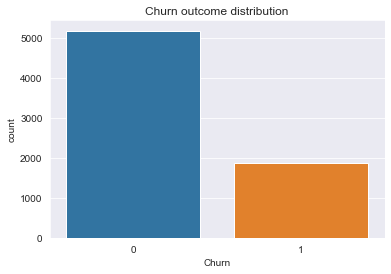

In [11]:
# plotting with target feature
sns.countplot(data=df, x='Churn')
plt.title('Churn outcome distribution')
plt.show()





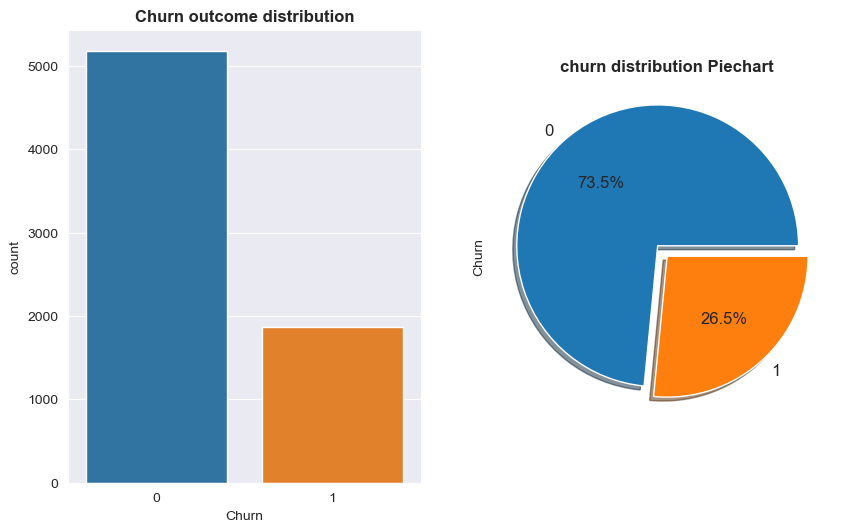

In [12]:
# plotting with target feature
fig, ax  = plt.subplots(1, 2, figsize=(10, 6),dpi=100)

ax0 = sns.countplot(data=df, x='Churn',ax= ax[0])
#ax[0].plt.title('Churn outcome distribution')
ax[0].set_title('Churn outcome distribution',fontweight='bold')

#plt.show()


explode = [0.1, 0]
ax1 = df['Churn'].value_counts().plot.pie(autopct='%1.1f%%',explode = explode,shadow= True,ax= ax[1],fontsize=12);
#ax[1].plt.title("churn distribution", fontweight='bold')
ax[1].set_title("churn distribution Piechart", fontweight='bold')

plt.show()

#df["Churn"].value_counts().plot.pie(autopct= '%1.1f%%')

In [13]:
l1 = df.loc[df['Churn']== 'Yes'].count()[0]
print(f"Pecentage of Left: {l1/len(df['Churn'])}")
print(df.Churn.value_counts())

Pecentage of Left: 0.0
0    5174
1    1869
Name: Churn, dtype: int64


In [14]:
### How many amount loss from customer churn
loss = []
for values in df.loc[df['Churn'] == 'Yes', 'TotalCharges']:
    value = float(values)
    loss.append(value)
print(np.round(sum(loss)))

0


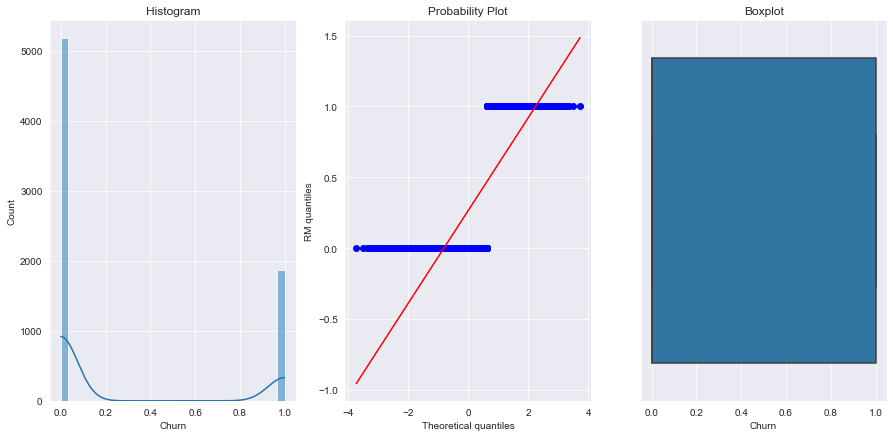

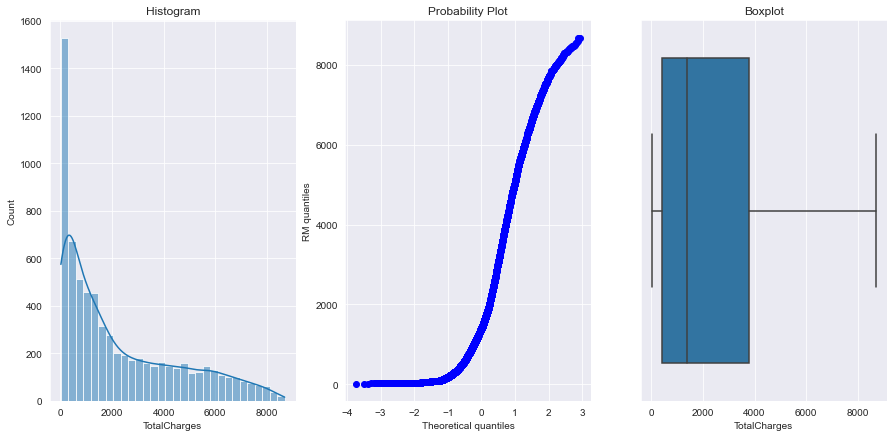

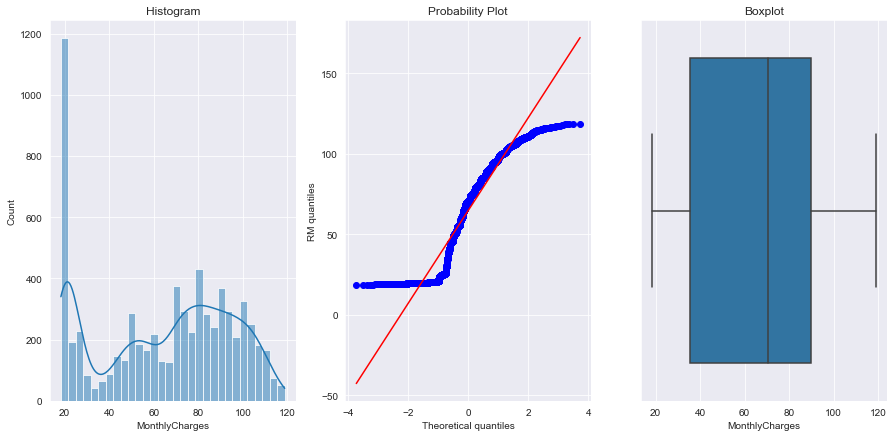

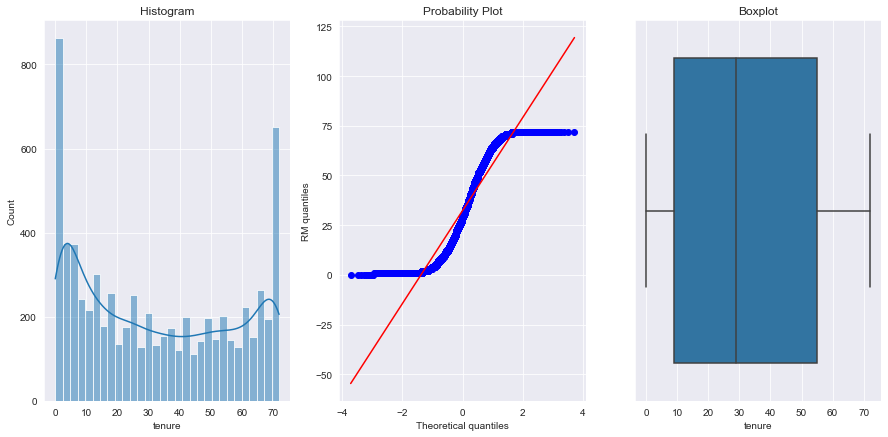

In [15]:
### Plotting numerical feature with probability distribution and checking outlier
for feature in numerical_feature:
    if feature != 'SeniorCitizen':
        plt.figure(figsize=(15,7))
    
        plt.subplot(1, 3, 1)
        sns.histplot(data=df, x=feature, bins=30, kde=True)
        plt.title('Histogram')
    
        plt.subplot(1, 3, 2)
        stats.probplot(df[feature], dist="norm", plot=plt)
        plt.ylabel('RM quantiles')
    
        plt.subplot(1, 3, 3)
        sns.boxplot(x=df[feature])
        plt.title('Boxplot')
    
plt.show()

In [16]:
# numerical feature
numerical_feature = {feature for feature in df.columns if df[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')

Count of Numerical feature: 4
Numerical feature are:
 {'Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'}


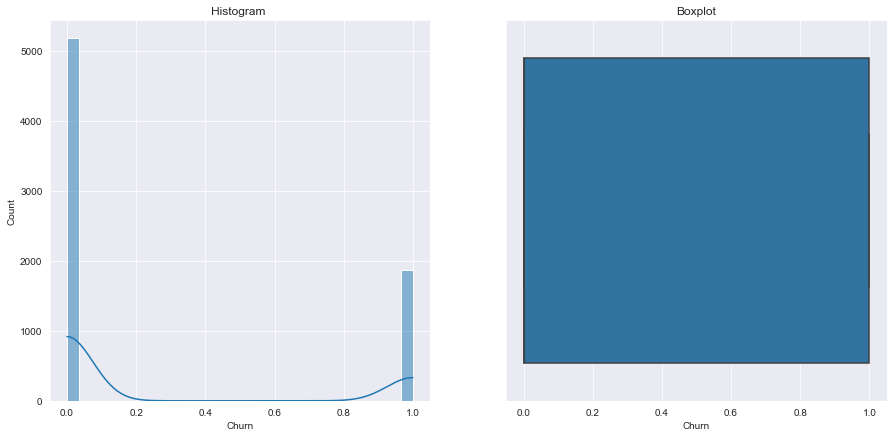

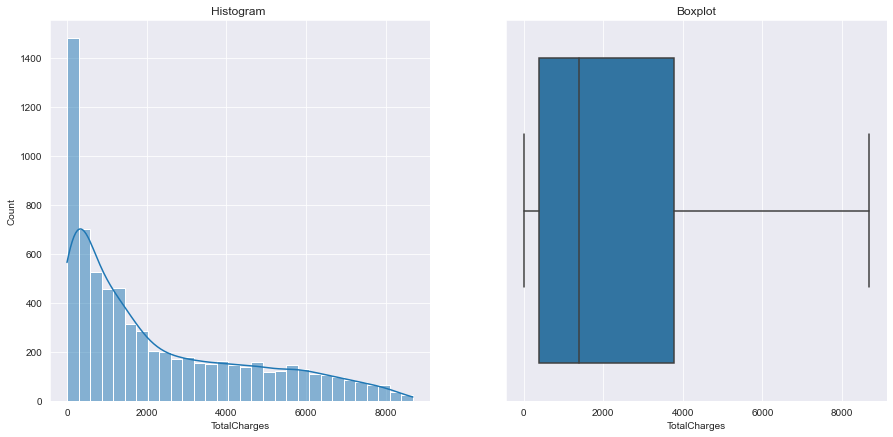

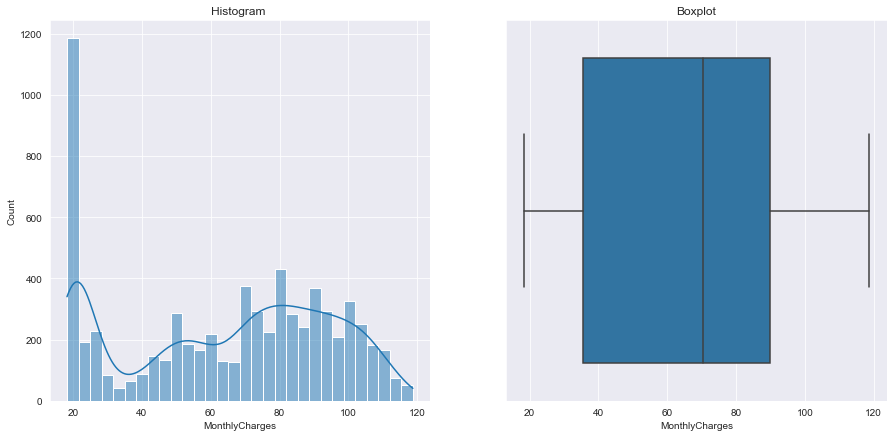

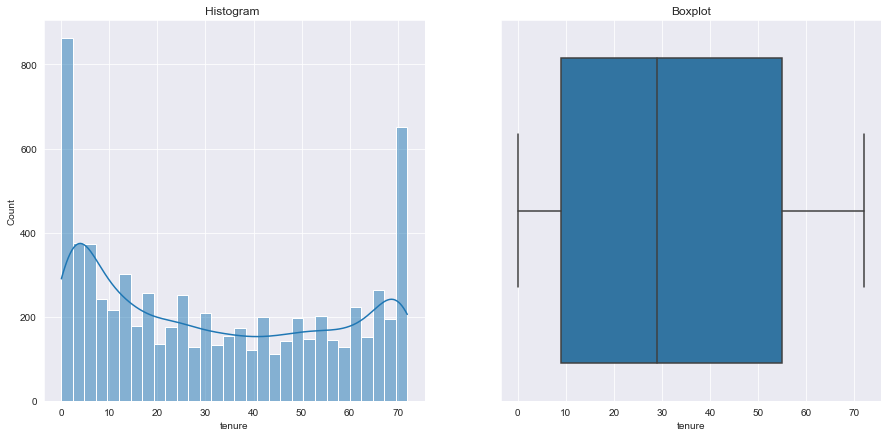

In [73]:
### Plotting numerical feature with probability distribution and checking outlier
for feature in numerical_feature:
    if feature != 'SeniorCitizen':
        plt.figure(figsize=(15,7))
    
        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x=feature, bins=30, kde=True )
        plt.title('Histogram ')
    
       # plt.subplot(1, 3, 2)
        #stats.probplot(df[feature], dist="norm", plot=plt)
       # plt.ylabel('RM quantiles')
    
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[feature])
        plt.title('Boxplot')
        plt.savefig('foo.png')
    
plt.show()

# After ploting histogram probability distribution and box plot to find numerical value are in normally distribution and our dataset has no outlier dataset.So, we don't want to remove the outlier in our dataset

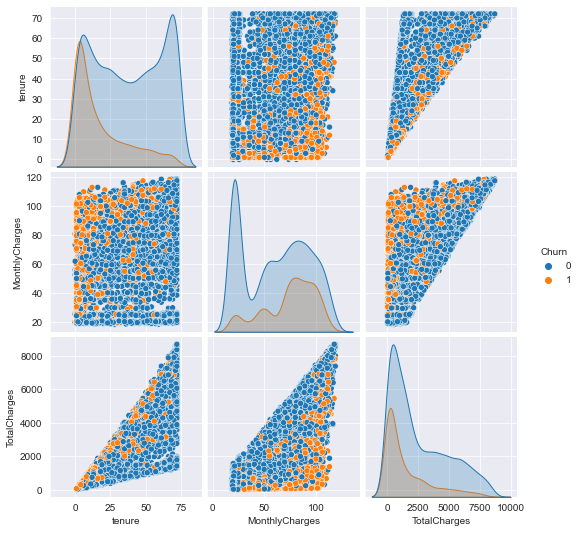

In [18]:
sns.pairplot(df.drop(columns='SeniorCitizen'),hue='Churn', kind='scatter')
plt.show()

In [19]:
def stacked_plot(df, group, target):
    """
    Function to generate a stacked plots between two variables
    """
    fig, ax = plt.subplots(figsize = (10,4))
    #fig, ax = plt.subplots(1,3,1)
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

# Gender, SeniorCitizen, Partner, Dependents

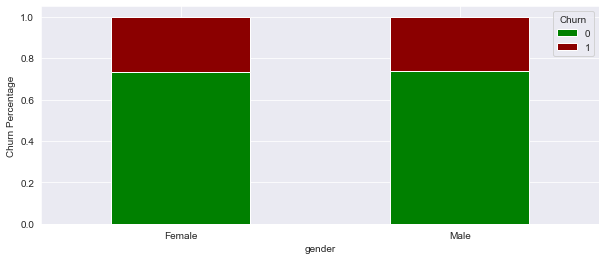

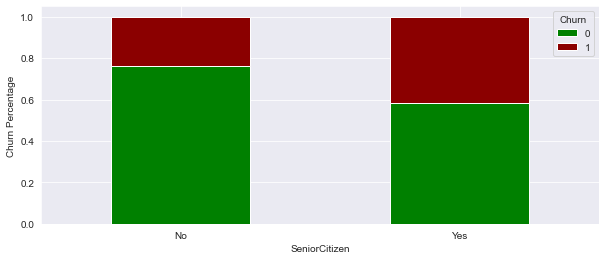

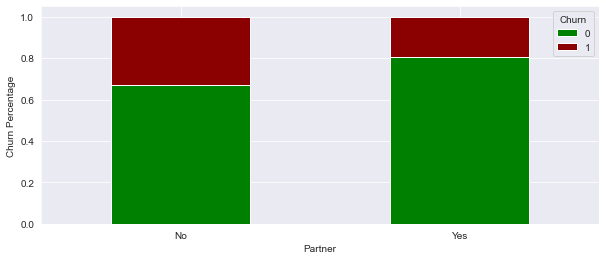

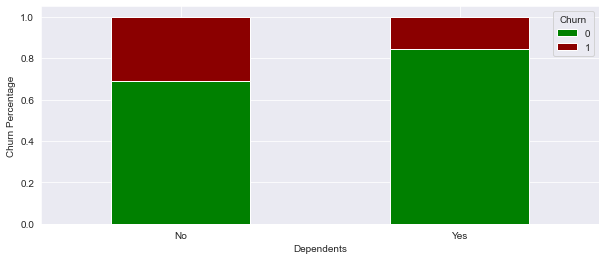

In [20]:
stacked_plot(df, "gender", "Churn")
stacked_plot(df, "SeniorCitizen", "Churn")
stacked_plot(df, "Partner", "Churn")
stacked_plot(df, "Dependents", "Churn")

In [21]:
def stacked_plot(df, group, target_column):
    
          
    """
    Function to generate a stacked plots between two variables
    """
    fig, ax = plt.subplots(figsize = (10,6))
    #fig, ax = plt.subplots(figsize = (10,6))
    #temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    #temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target.apply(lambda x: x/x.sum()*100, axis=1), index=group, values=0)
    # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
    temp_df = pd.crosstab(df[group], df[target_column]).apply(lambda x: x/x.sum()*100, axis=1)
    
    #temp_df.plot(kind='bar',width = 0.3, stacked=True, ax = ax,color=['#0080ff', '#ff8000'], edgecolor='black', lw=1.5)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["cornflowerblue", "darkorange"],edgecolor='black')
    ax.xaxis.set_tick_params(rotation=0)
    
  # add annotations
    for c in ax.containers:
        # set the bar label
        ax.bar_label(c, fmt='%.2f%%',label_type='center')
        #ax.bar_label(c, fmt='%1.1f%%',label_type='center')
    
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

# stacked plot of demographic columns

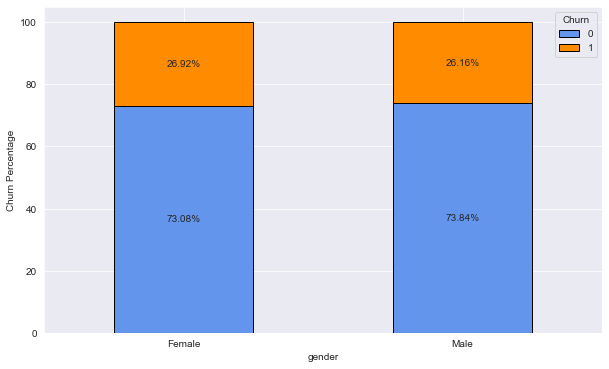

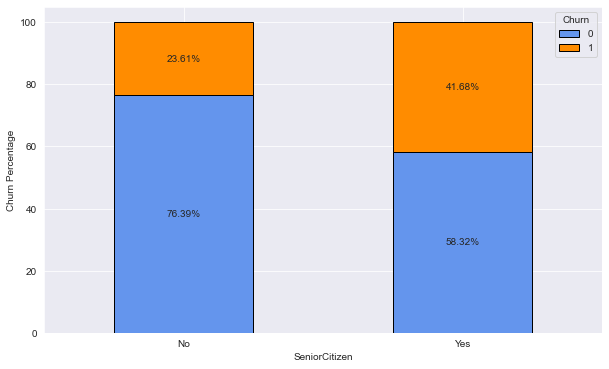

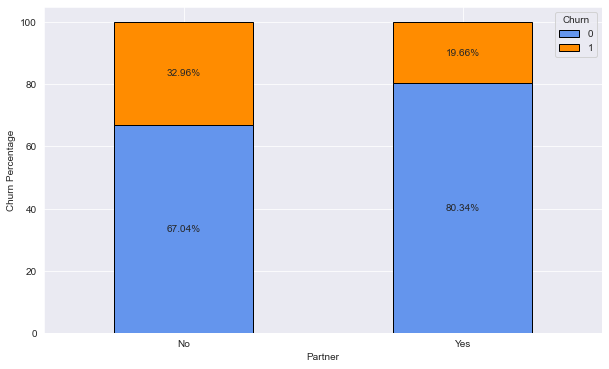

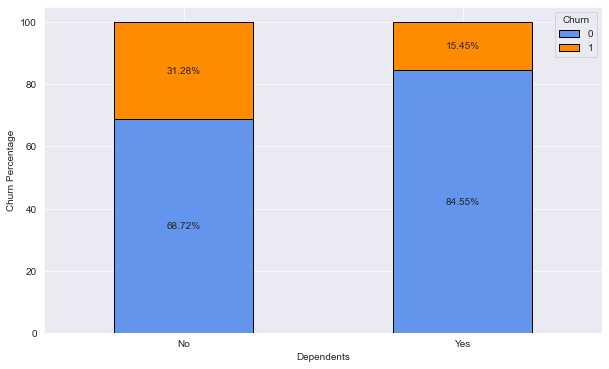

In [22]:
# stacked plot of demographic columns
stacked_plot(df, "gender", "Churn")
stacked_plot(df, "SeniorCitizen", "Churn")
stacked_plot(df, "Partner", "Churn")
stacked_plot(df, "Dependents", "Churn")

From above plots, we can say following:

    1)Gender alone does not help us predict the customer churn.
    2)If a person is young and has a family, he or she is less likely to stop the service as we can see below. The reason might be the busy life, more money or another factors.

In [23]:

df[(df.SeniorCitizen == 0) & (df.Partner == 'Yes') & (df.Dependents == 'Yes')].Churn.value_counts()

Series([], Name: Churn, dtype: int64)

In [24]:
df[(df.SeniorCitizen == 0) & (df.Partner == 'Yes') & (df.Dependents == 'No')].Churn.value_counts()

Series([], Name: Churn, dtype: int64)

In [25]:

df[(df.SeniorCitizen == 0) & (df.Partner == 'No') & (df.Dependents == 'Yes')].Churn.value_counts()

Series([], Name: Churn, dtype: int64)

In [26]:
df[(df.SeniorCitizen == 0) & (df.Partner == 'No') & (df.Dependents == 'No')].Churn.value_counts()

Series([], Name: Churn, dtype: int64)

# Tenure

In [27]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [28]:
df['tenure'].value_counts().head(10)

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
Name: tenure, dtype: int64

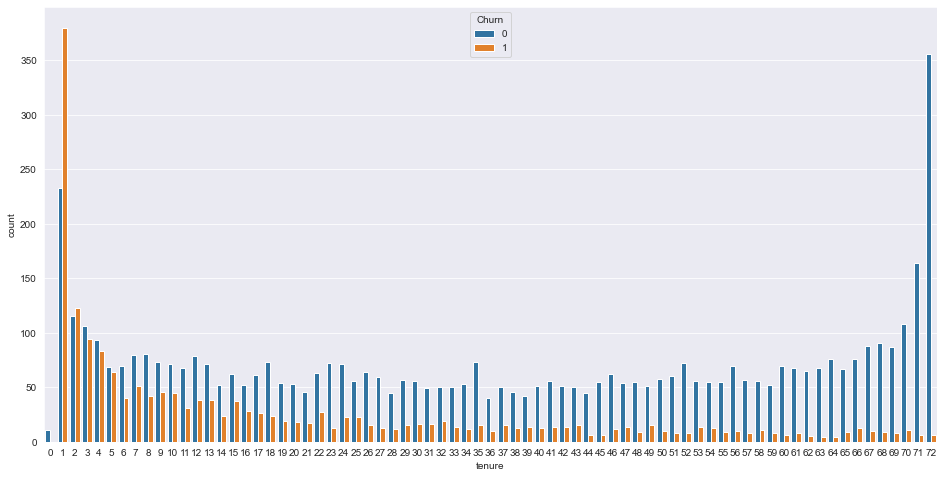

In [29]:
plt.figure(figsize=(16,8))
sns.countplot(x="tenure", hue="Churn", data=df)
plt.show()

As we can see the higher the tenure, the lesser the churn rate. This tells us that the customer becomes loyal with the tenure.

Converting into 5 groups to reduce model complexity.

In [30]:
def tenure(t):
    if t<=12:
        return 1
    elif t>12 and t<=24:
        return 2
    elif t>24 and t<=36:
        return 3
    elif t>36 and t<=48:
        return 4
    elif t>48 and t<=60:
        return 5
    else:
        return 6

df["tenure_group"]=df["tenure"].apply(lambda x: tenure(x))

In [31]:

df["tenure_group"].value_counts()

1    2186
6    1407
2    1024
3     832
5     832
4     762
Name: tenure_group, dtype: int64

<AxesSubplot:xlabel='tenure_group', ylabel='count'>

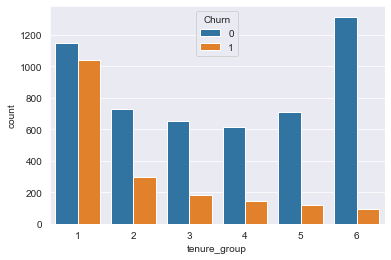

In [32]:
sns.countplot(x="tenure_group", hue="Churn", data=df)

# Phone Service and MultipleLines

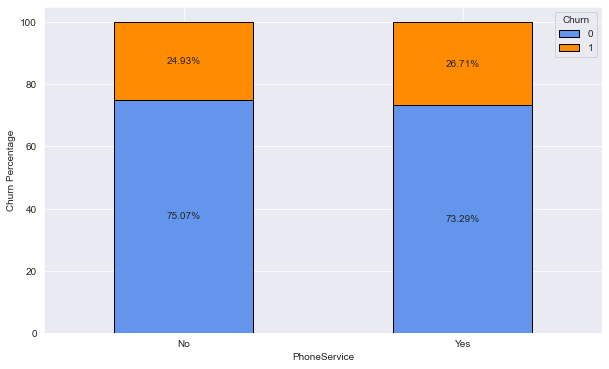

In [33]:
stacked_plot(df, "PhoneService", "Churn")

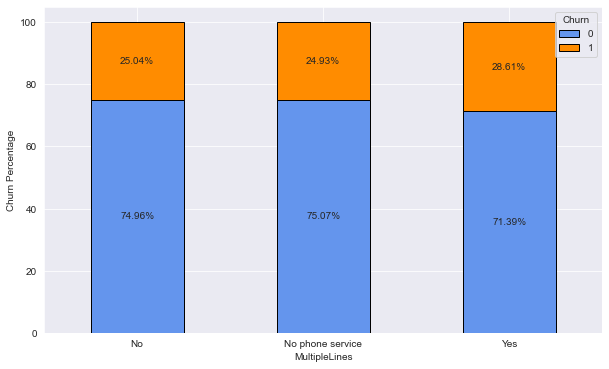

In [34]:

stacked_plot(df, "MultipleLines", "Churn")

As we can see multiplelines and phoneservice do not add value in the model having similar churn rate.

# OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

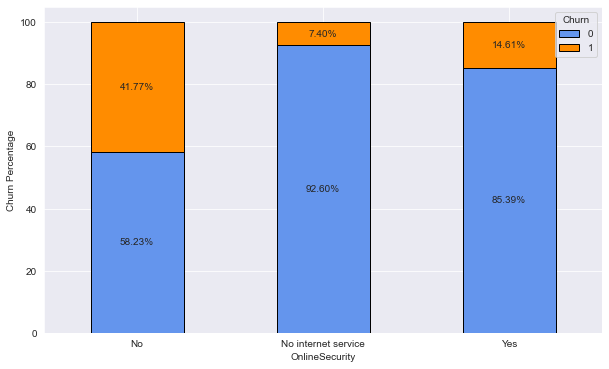

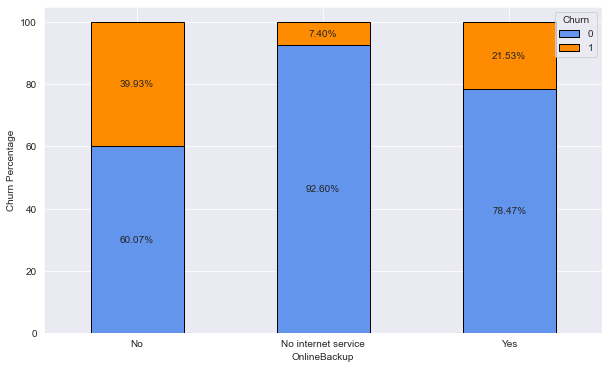

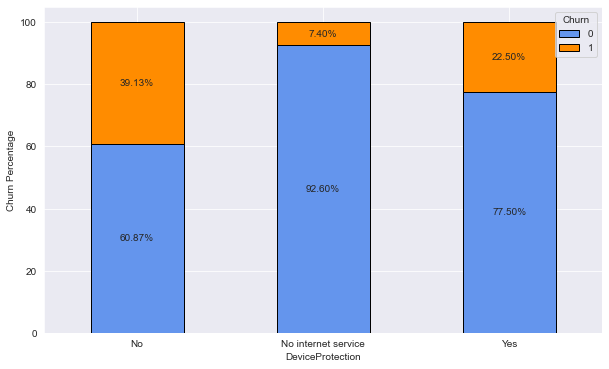

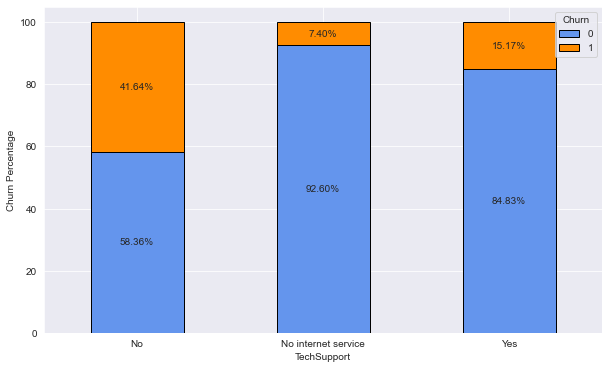

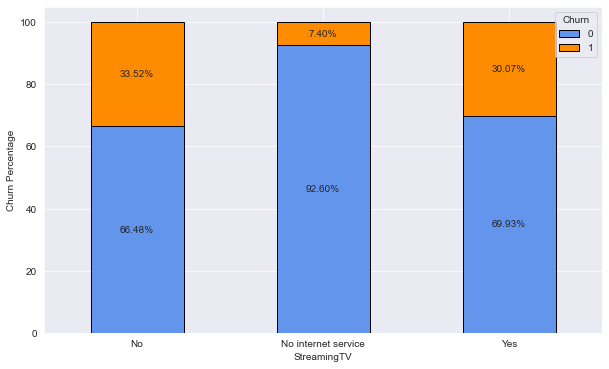

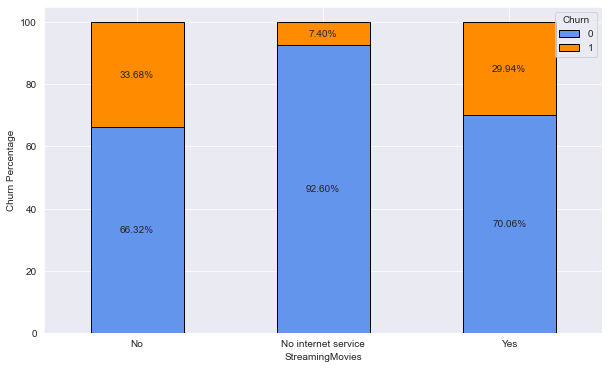

In [35]:
stacked_plot(df, "OnlineSecurity", "Churn")
stacked_plot(df, "OnlineBackup", "Churn")
stacked_plot(df, "DeviceProtection", "Churn")
stacked_plot(df, "TechSupport", "Churn")
stacked_plot(df, "StreamingTV", "Churn")
stacked_plot(df, "StreamingMovies", "Churn")

In all above categories we see consistent results. If a person does not opt for internet service, the customer churning is less. 
The reason might be the less cost of the service. 
Also, if they have internet service and does not opt for specific service their probability of churning is high.

C:\Users\shash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

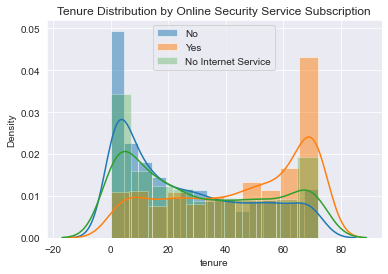

In [36]:
# OnlineSecurity
sns.distplot(df.tenure[df.OnlineSecurity == "No"], hist_kws=dict(alpha=0.5), label="No")
sns.distplot(df.tenure[df.OnlineSecurity == "Yes"], hist_kws=dict(alpha=0.5), label="Yes")
sns.distplot(df.tenure[df.OnlineSecurity == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Online Security Service Subscription")
plt.legend()
plt.show()

C:\Users\shash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

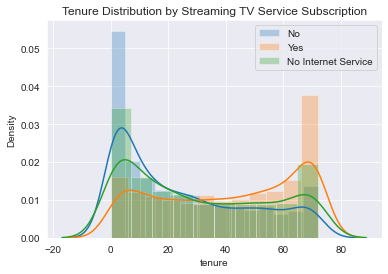

In [37]:
# StreamingTV

sns.distplot(df.tenure[df.StreamingTV == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df.tenure[df.StreamingTV == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(df.tenure[df.StreamingTV == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Streaming TV Service Subscription")
plt.legend()
plt.show()

C:\Users\shash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

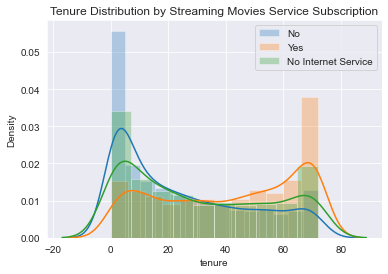

In [38]:
#StreamingMovies

sns.distplot(df.tenure[df.StreamingMovies == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df.tenure[df.StreamingMovies == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(df.tenure[df.StreamingMovies == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Streaming Movies Service Subscription")
plt.legend()
plt.show()

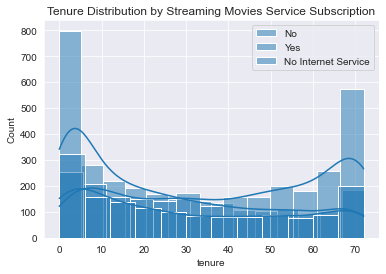

In [39]:
#StreamingMovies

sns.histplot(df.tenure[df.StreamingMovies == "No"],kde = True,  label="No")
sns.histplot(df.tenure[df.StreamingMovies == "Yes"],kde = True,   label="Yes")
sns.histplot(df.tenure[df.StreamingMovies == "No internet service"],kde = True,  label="No Internet Service")

plt.title("Tenure Distribution by Streaming Movies Service Subscription")
plt.legend()
plt.show()

As we can see, when the customers are new they do not opt for various services and their churning rate is very high.

# InternetService

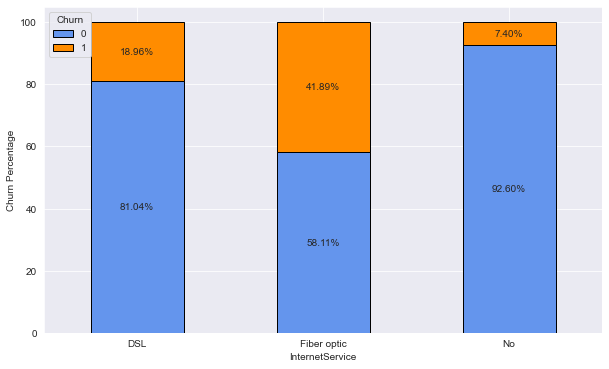

In [40]:
stacked_plot(df, "InternetService", "Churn")

When the internet service is Fiber Optic, the churn rate is very high. Fiber Optics provides highr speed compared to DSL. The reason might be the higher cost of fiber optics.

C:\Users\shash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InternetService', ylabel='count'>

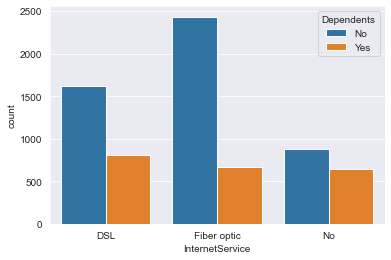

In [41]:
sns.countplot(df.InternetService, hue = df.Dependents)

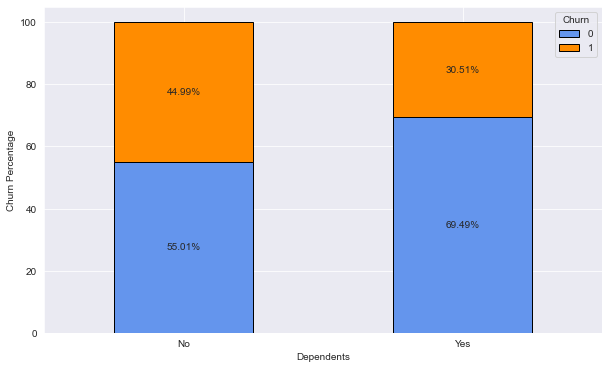

In [42]:
stacked_plot(df[df.InternetService == "Fiber optic"], "Dependents", "Churn")

Mostly people without dependents go for fiber optic option as Internnet Service and their churning percentage is high.

C:\Users\shash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InternetService', ylabel='count'>

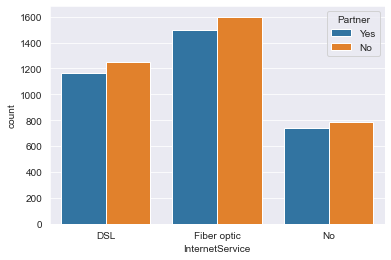

In [43]:
sns.countplot(df.InternetService, hue = df.Partner)

C:\Users\shash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InternetService', ylabel='count'>

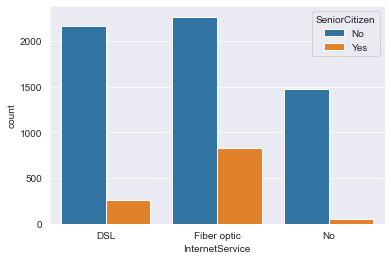

In [44]:
sns.countplot(df.InternetService, hue = df.SeniorCitizen)

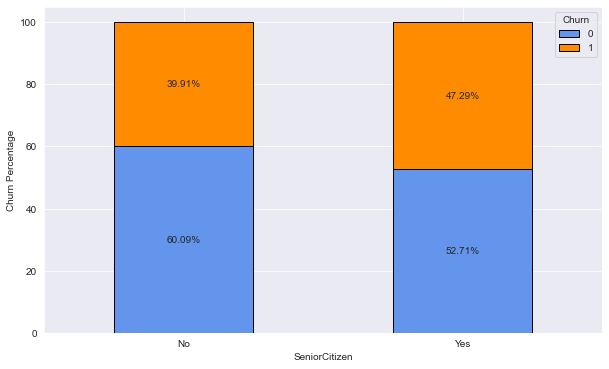

In [45]:

stacked_plot(df[df.InternetService == "Fiber optic"], "SeniorCitizen", "Churn")

As we can see, Partner and Senior Citizen do not tell us anything about why fiber optics have higher churning rate.

C:\Users\shash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

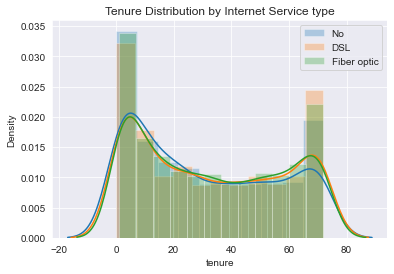

In [46]:
sns.distplot(df.tenure[df.InternetService == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df.tenure[df.InternetService == "DSL"], hist_kws=dict(alpha=0.3), label="DSL")
sns.distplot(df.tenure[df.InternetService == "Fiber optic"], hist_kws=dict(alpha=0.3), label="Fiber optic")
plt.title("Tenure Distribution by Internet Service type")
plt.legend()
plt.show()

Also, the tenure distribution of customers with different internet service is similar.

In [47]:
df[df.InternetService == 'No'].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
11,Male,No,No,No,16,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,0,2
16,Female,No,No,No,52,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,0,5
21,Male,No,Yes,No,12,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,0,1
22,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,1,1
33,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,0,1


In [48]:
df[df.InternetService == 'No'].OnlineSecurity.value_counts()

No internet service    1526
Name: OnlineSecurity, dtype: int64

In [49]:
df[df.InternetService == 'No'].OnlineBackup.value_counts()

No internet service    1526
Name: OnlineBackup, dtype: int64

In [50]:
df[df.InternetService == 'No'].DeviceProtection.value_counts()

No internet service    1526
Name: DeviceProtection, dtype: int64

In [51]:
df[df.InternetService == 'No'].TechSupport.value_counts()

No internet service    1526
Name: TechSupport, dtype: int64

In [52]:
df[df.InternetService == 'No'].StreamingMovies.value_counts()

No internet service    1526
Name: StreamingMovies, dtype: int64

In [53]:
df[df.InternetService == 'No'].StreamingTV.value_counts()

No internet service    1526
Name: StreamingTV, dtype: int64

# Contract

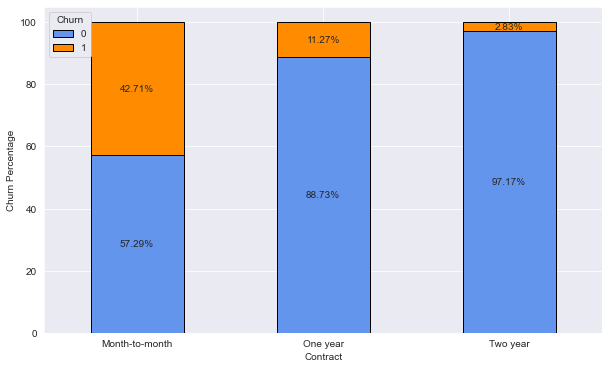

In [54]:
stacked_plot(df, "Contract", "Churn")

In the case of Month-to-month contract Churn rate is very high. There is also a posibility of having customers in the dataframe who are still in their two-year or one-year contract plan.

C:\Users\shash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InternetService', ylabel='count'>

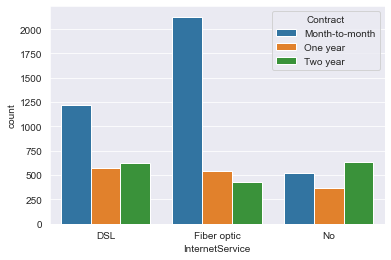

In [55]:
sns.countplot(df.InternetService, hue = df.Contract)

Many of the people of who opt for month-to-month Contract choose Fiber optic as Internet service and this is the reason for higher churn rate for fiber optic Internet service type.

# PaymentMethod

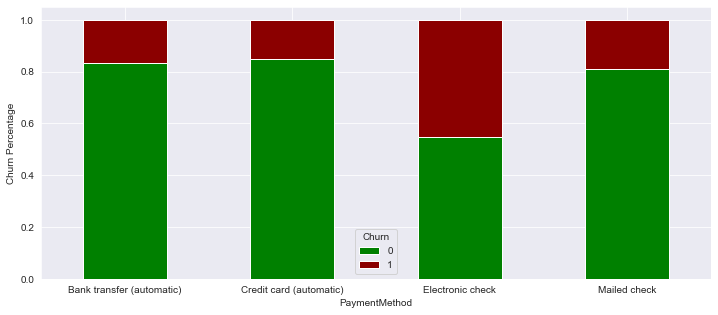

In [56]:
group = "PaymentMethod"
target = "Churn"
fig, ax = plt.subplots(figsize = (12,5))
temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel(group)
ax.set_ylabel('Churn Percentage');

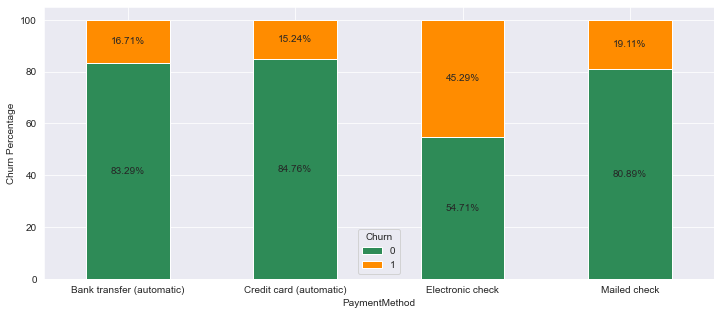

In [57]:
group = "PaymentMethod"
target = "Churn"
fig, ax = plt.subplots(figsize = (12,5))
#temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
temp_df = pd.crosstab(df[group], df[target]).apply(lambda x: x/x.sum()*100, axis=1)
temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["seagreen", "darkorange"])
ax.xaxis.set_tick_params(rotation=0)
# add annotations
for c in ax.containers:
    # set the bar label
    ax.bar_label(c, fmt='%.2f%%',label_type='center')

ax.set_xlabel(group)
ax.set_ylabel('Churn Percentage');

In the case of Electronic check, churn is very high.

C:\Users\shash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

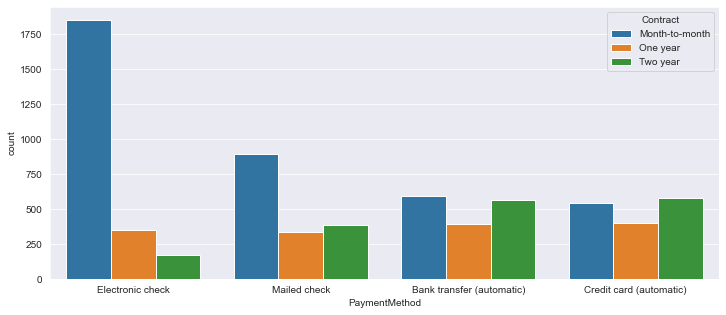

In [58]:
fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(df.PaymentMethod, hue = df.Contract, ax = ax)

# PaperlessBilling

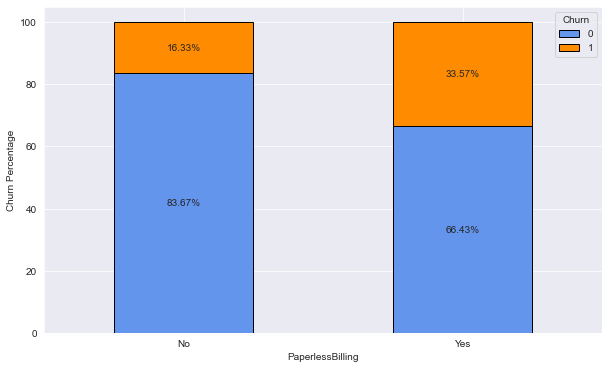

In [59]:

stacked_plot(df, "PaperlessBilling", "Churn")

# TotalCharges

In [60]:
df.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [61]:
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)
df['TotalCharges'].isna().sum() 

11

Total charges is having 11 record with no data

In [62]:

df[df["TotalCharges"].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0,1
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0,1
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0,1
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0,1
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0,1
3331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0,1
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0,1
4380,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0,1
5218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0,1
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0,1


All the customers having tenure = 0 have null total charges which means that these customers recently joined and we can fill those missing values as 0.

In [63]:
df.loc[df["TotalCharges"].isnull(), 'TotalCharges'] = 0
df.isnull().any().any()

False

In [64]:
df['TotalCharges'] = df["TotalCharges"].astype(float)

Churn = df[df.Churn=="Yes"]
Not_Churn = df[df.Churn=="No"]

No handles with labels found to put in legend.


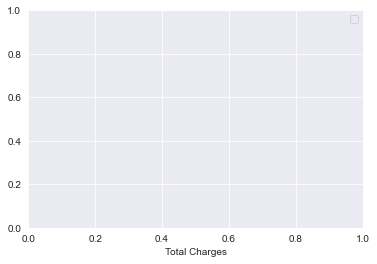

In [65]:
fig, ax = plt.subplots()
#plt.figure(figsize=(9, 4))
sns.kdeplot(Churn["TotalCharges"],label = "Churn", ax= ax)
sns.kdeplot(Not_Churn["TotalCharges"], label = "Not Churn", ax=ax)
ax.set_xlabel("Total Charges");
plt.legend()
plt.show()

The density of total charges for churning customers are high around 0. As many customers cancel the subsription in 1-2 months.

# Monthly Charges

In [66]:
df.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [67]:
df.MonthlyCharges.isna().sum()

0

No handles with labels found to put in legend.


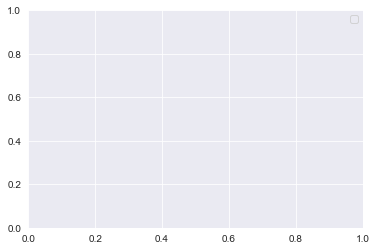

In [68]:
sns.kdeplot(Churn["MonthlyCharges"], label = "Churn")
sns.kdeplot(Not_Churn["MonthlyCharges"], label = "Not Churn")
plt.legend()
plt.show()

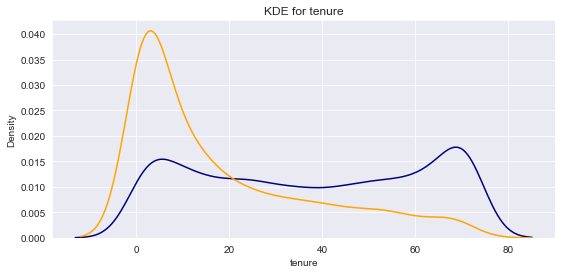

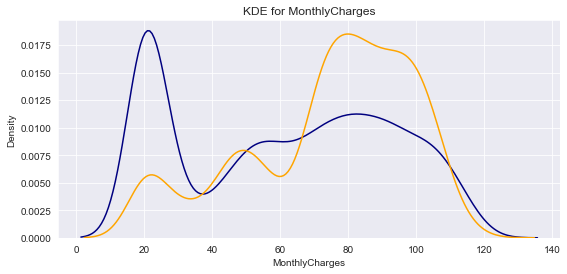

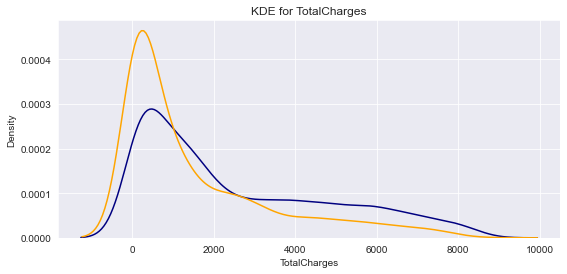

In [69]:
#There are only three numerical columns: tenure, monthly charges and total charges.
#The probability density distribution can be estimate using the seaborn kdeplot function.
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 0][feature], color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 1][feature], color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

The customers paying high monthly fees churn more.

Let's see the correlation of total charges and (monthly charges x tenure) to check if we have redundant information.

In [70]:
np.corrcoef(df.TotalCharges, df.MonthlyCharges*df.tenure)

array([[1.        , 0.99956055],
       [0.99956055, 1.        ]])

Let's keep total charges as it shows the interaction between tenure and monthly charges

# Fucntion to prepare data for model building based on EDA

In [71]:
def datapreparation(filepath):
    
    df = pd.read_csv(filepath)
    df.drop(["customerID"], inplace = True, axis = 1)
    
    df.TotalCharges = df.TotalCharges.replace(" ",np.nan)
    df.TotalCharges.fillna(0, inplace = True)
    df.TotalCharges = df.TotalCharges.astype(float)
    
    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)
   
    df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1)
    df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})
    
    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        df[col] = df[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})
    
    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
    
    return df

In [72]:
https://github.com/Sou-786/Customer-Survival-and-Churn-Prediction/blob/master/Churn_pred.ipynb

SyntaxError: invalid syntax (Temp/ipykernel_5908/3322419882.py, line 1)

# Catagorical:

In [ ]:
#visualise the distibution of data
categorical = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines",
               "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
               "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling",'PaymentMethod']
fig, ax = plt.subplots(4, 4, figsize=(20, 12))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot, palette = "Set2")

In [ ]:
plt.figure(figsize=(3,3))
chart = sns.countplot(df.PaymentMethod, palette = "Set2")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
fig, ax = plt.subplots(3, 5, figsize=(20, 12))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable],hue=df["Churn"], ax=subplot, palette = "Set2")

In [ ]:
plt.figure(figsize=(3,3))
chart = sns.countplot(df.PaymentMethod,hue=df["Churn"], palette = "Set2")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
data = df

In [ ]:
def stacked_plot(data, features, target):
    fig, ax = plt.subplots(figsize = (6,4))
    df = (data.groupby([features, target]).size()/data.groupby(features)[target].count()).reset_index().pivot(columns=target, index=features, values=0)
    df.plot(kind='bar', stacked=True, ax = ax, color = ["blue", "orange"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(features)
    ax.set_ylabel('Churn Percentage')

# Demographics

In [ ]:
stacked_plot(data, "gender", "Churn")
stacked_plot(data, "SeniorCitizen", "Churn")
stacked_plot(data, "Partner", "Churn")
stacked_plot(data, "Dependents", "Churn")

In [ ]:
stacked_plot(data, "PhoneService", "Churn")
stacked_plot(data, "MultipleLines", "Churn")

In [ ]:
stacked_plot(data, "OnlineSecurity", "Churn")
stacked_plot(data, "OnlineBackup", "Churn")
stacked_plot(data, "DeviceProtection", "Churn")
stacked_plot(data, "TechSupport", "Churn")
stacked_plot(data, "StreamingTV", "Churn")
stacked_plot(data, "StreamingMovies", "Churn")

In [ ]:
## phone service, multiple lines, internet service
display(pd.crosstab(data['Churn'], [data['PhoneService'], data['MultipleLines'], data['InternetService']], dropna=False))

In [ ]:
## phone service, internet service, seniorcitizen
crosstab_cols = [data['PhoneService'], data['SeniorCitizen'], data['InternetService']]
display(pd.crosstab(data['Churn'], crosstab_cols, dropna=False))

In [ ]:

## phone service, internet service, gender
crosstab_cols = [data['PhoneService'], data['gender'], data['InternetService']]
display(pd.crosstab(data['Churn'], crosstab_cols, dropna=False))

In [ ]:
## internet service, streamingtv, streamingmovies
crosstab_cols = [data['StreamingTV'], data['StreamingMovies'], data['InternetService']]
display(pd.crosstab(data['Churn'], crosstab_cols))

In [ ]:
#contract & internet service 
crosstab_cols = [data['Contract'],data['InternetService']]
display(pd.crosstab(data['Churn'], crosstab_cols))

In [ ]:
#There are only three numerical columns: tenure, monthly charges and total charges.
#The probability density distribution can be estimate using the seaborn kdeplot function.
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(data[data['Churn'] == 0][feature], color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(data[data['Churn'] == 1][feature], color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

# Check for Outliers in Numerical Features

In [ ]:
num_features= ['tenure', 'MonthlyCharges', 'TotalCharges']
df_num = data[num_features]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()


In [ ]:
print('No outliers in numerical features detected with the IQR method.')

# Feature Engineering

In [ ]:
np.corrcoef(data.TotalCharges, data.MonthlyCharges*data.tenure)

In [ ]:
https://github.com/Sou-786/Customer-Survival-and-Churn-Prediction/blob/master/Churn_pred.ipynb
    
    parameter tunning